In this notebook we present some useful routines for certain computations in Cosmology.

Let us define the Hubble's constant $H_0$.

In [1]:
Hzero =  1/(9.78*10^9) #years.

We are interested in computing the age of the Universe for given values of $\Omega_\Lambda$, $\Omega_{\mathrm{M}}$, $\Omega_{\mathrm{R}}$ and $h$, where we will take into account
$$
    1 = \Omega_\Lambda + \Omega_{\mathrm{R}} + \Omega_{\mathrm{M}} + \Omega_{\mathrm{k}},
$$
being $\Omega_{\mathrm{k}}$ the curvature density parameter, that for a flat spacetime is equal to 0. Therefore, the age of the Universe is given by
$$
    t_{\mathrm{U}} = \frac{1}{h H_0}\int_0^1 \mathrm{d}x \, \frac{1}{x\sqrt{\Omega_\Lambda+\Omega_{\mathrm{M}}x^{-3}+\Omega_{\mathrm{R}}x^{-4}+(1 - \Omega_\Lambda - \Omega_{\mathrm{R}} - \Omega_{\mathrm{M}})x^{-2}}}.
$$

In [2]:
def AgeUniverse(OmegaLambda,OmegaM,OmegaR,h):
    Omegak = 1-OmegaLambda-OmegaM-OmegaR
    return numerical_integral(1/(x*sqrt(OmegaLambda+OmegaM/x^3+OmegaR/x^4+Omegak/x^2)),0,1)[0]/(h*Hzero)

If we want to compute the age of the Universe for a given redshift $z$,
   $$
       t_{\mathrm{U}}(z) = \frac{1}{h H_0}\int_0^{1/(1+z)} \mathrm{d}x \, \frac{1}{x\sqrt{\Omega_\Lambda+\Omega_{\mathrm{M}}x^{-3}+\Omega_{\mathrm{R}}x^{-4}+(1 - \Omega_\Lambda - \Omega_{\mathrm{R}} - \Omega_{\mathrm{M}})x^{-2}}}.
   $$

In [3]:
def AgeUniverseRedshift(OmegaLambda,OmegaM,OmegaR,h,z):
    Omegak = 1-OmegaLambda-OmegaM-OmegaR
    return numerical_integral(1/(x*sqrt(OmegaLambda+OmegaM/x^3+OmegaR/x^4+Omegak/x^2)),0,1/(1+z))[0]/(h*Hzero)

In [4]:
AgeUniverseRedshift(0.75, 0.25, 0, 0.68, 1500)

329759.843165775

Plot of the difference between apparent and absolute magnitudes, i.e., $m-M$, for a given redshift in a zero curvature universe.

In [5]:
def RedshiftKZero(OmegaLambda,OmegaM,OmegaR,h,z):
    return numerical_integral(1/(x^2*sqrt(OmegaLambda+OmegaM/x^3+OmegaR/x^4)),1/(1+z),1)[0]*(1+z)*3*10^8/h
def mM(OmegaLambda,OmegaM,OmegaR,h,z):
    return 5*log(RedshiftKZero(OmegaLambda,OmegaM,OmegaR,h,z))/log(10.)

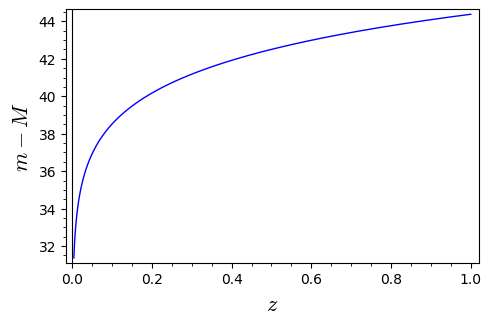

In [6]:
plot(lambda x:mM(0.76, 0.24, 0, 0.64,x),(x,0.004,1), axes_labels=[r'$z$', r'$m-M$'],frame=True).show(figsize=5)